In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches  # Import for creating custom legend handles

from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Adding target variable for better visualization

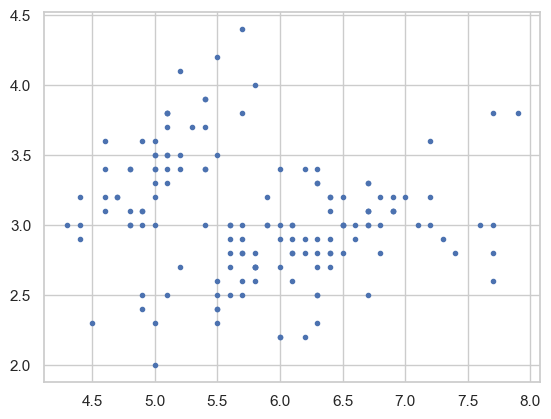

In [364]:
x = df["sepal length (cm)"]
y = df["sepal width (cm)"]

plt.plot(x,y, ".")
plt.show()

#df.to_excel('flower_data.xlsx', index=False)

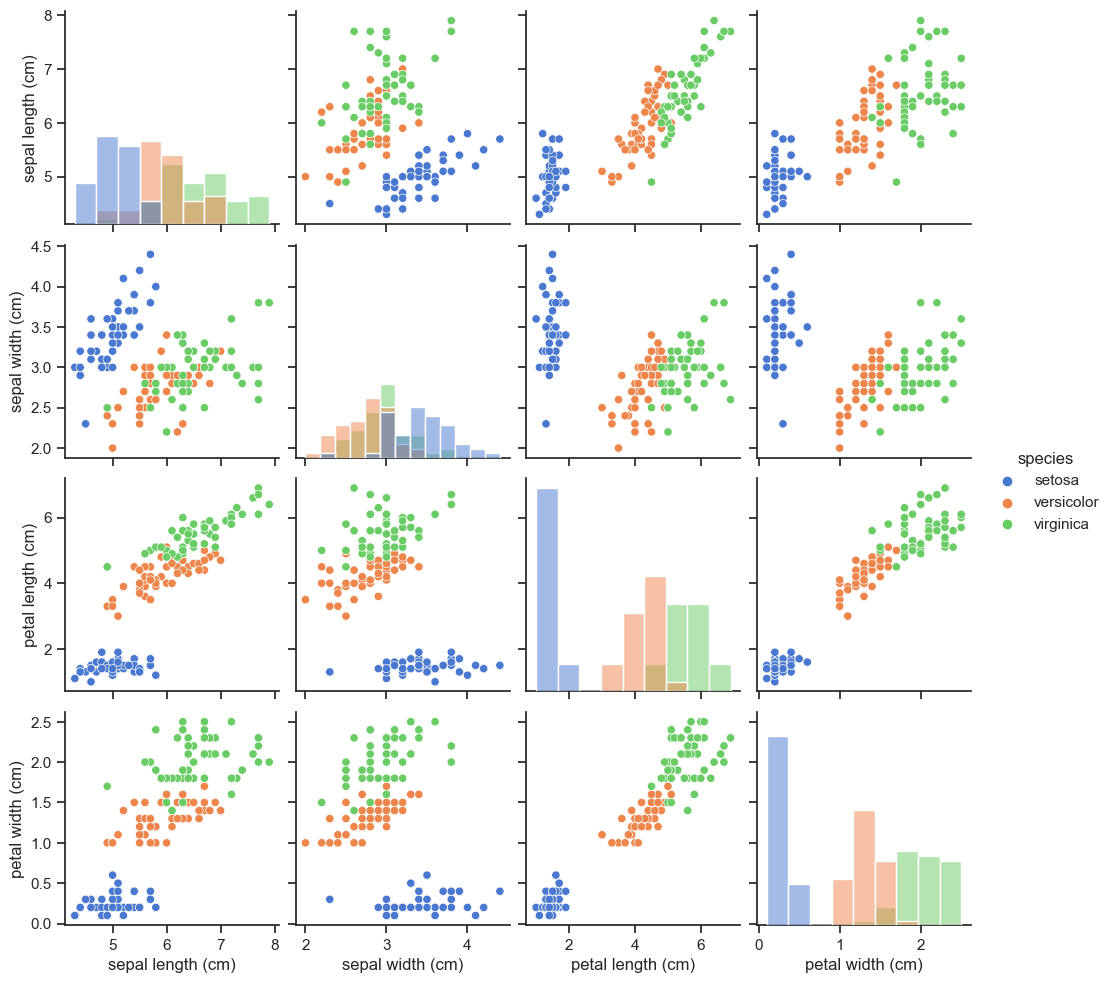

In [365]:
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

sns.set_theme(style="ticks")

pairplot = sns.pairplot(df, 
                        vars=data.feature_names, 
                        hue='species',  # Color by species
                        diag_kind='hist',  # Use histogram on the diagonal
                        palette='muted')  # Choose a color palette

features = {
    "sepal length (cm)": "skyblue",
    "sepal width (cm)": "lightgreen",
    "petal length (cm)": "salmon",
    "petal width (cm)": "plum"
}

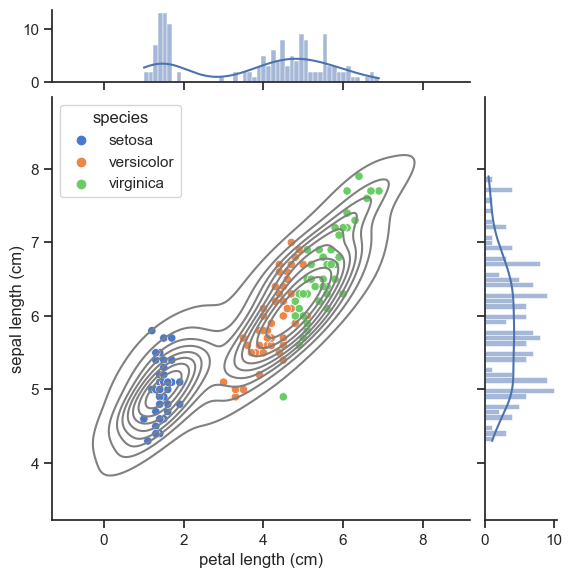

In [366]:
# Define the seaborn plot style ("ticks" is good for science)
sns.set_theme(style="ticks")

# Create the Joint Grid with radius on x-axis and orbital period on y
g = sns.JointGrid(x=df['petal length (cm)'], y=df['sepal length (cm)'], marginal_ticks=True)
# Plot limits can be explicitly given with xlim= and ylim=

# We already know we need log scale for the radii 
# With the seaborn JointGrid object stored as g w can actively change the axis types

# Likewise we can now Label the x and y axis explicitly
#g.ax_joint.set(xlabel='planet radius ($R_J$)', ylabel='orbital period (days)')

# Let's fill the main plot area: no need to give x and y axis again as they are already in the "g" seaborn object 
g.plot_joint(sns.scatterplot, hue=df['species'], palette="muted")

# Overlay with a second plot showing the lines of equal probability
g.plot_joint(sns.kdeplot, color="gray")

# Now add margin graphs containing histograms of the data, as well as smooth density line (kde=True)
g.plot_marginals(sns.histplot, bins=50, kde=True)


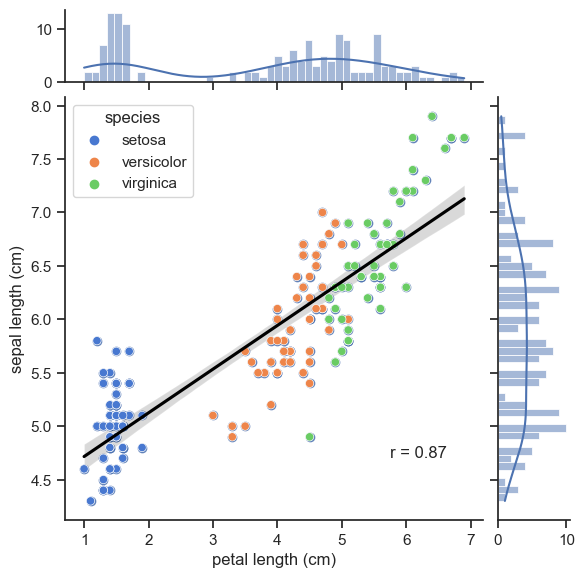

In [367]:
# Define the seaborn plot style ("ticks" is good for natural science)
sns.set_theme(style="ticks")

x_i = df['petal length (cm)']
y_i = df['sepal length (cm)']

# Make a seaborn joint plot including regression (trend) line
# the joint_kws parametr is used to color the line differently to make it stand out more
g=sns.jointplot(x=x_i, y=y_i, kind='reg', joint_kws={'line_kws':{'color':'black'}},marginal_ticks=True, marginal_kws={'bins': 50, 'kde': True}  )
# Note we explicitly use the log of the data here rather than the yscale parameter as we want to have the
# regression performed on the log of the data already

# Make proper labels
#g.ax_joint.set(xlabel='planet radius log($R_J$)', ylabel='planet mass log($M_J$)')

# seaborn only visualises data, need statistic function to calculate r
from scipy.stats import pearsonr
r, p = pearsonr(x_i, y_i)

# Add a text annotation containing the "r-value", the xycoords= command defines if the position of the 
# text is given in absolute values or as fraction of the figure size
g.plot_joint(sns.scatterplot, hue=df['species'], palette="muted")


g.ax_joint.annotate('r = {:.2f} '.format(r), xy=(0.65, 0.2), xycoords='figure fraction')


# Save the resulting plot in a vector graphic format
g.savefig("petal_length_vs_sepal_length.svg", bbox_inches='tight')



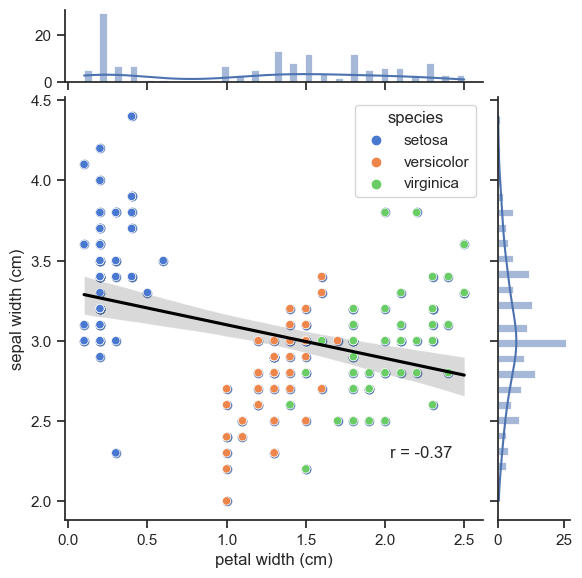

In [368]:
# Define the seaborn plot style ("ticks" is good for natural science)
sns.set_theme(style="ticks")

x_i = df['petal width (cm)']
y_i = df['sepal width (cm)']

# Make a seaborn joint plot including regression (trend) line
# the joint_kws parametr is used to color the line differently to make it stand out more
g=sns.jointplot(x=x_i, y=y_i, kind='reg', joint_kws={'line_kws':{'color':'black'}},marginal_ticks=True, marginal_kws={'bins': 50, 'kde': True}  )
# Note we explicitly use the log of the data here rather than the yscale parameter as we want to have the
# regression performed on the log of the data already

# Make proper labels
#g.ax_joint.set(xlabel='planet radius log($R_J$)', ylabel='planet mass log($M_J$)')

# seaborn only visualises data, need statistic function to calculate r
from scipy.stats import pearsonr
r, p = pearsonr(x_i, y_i)

# Add a text annotation containing the "r-value", the xycoords= command defines if the position of the 
# text is given in absolute values or as fraction of the figure size
g.plot_joint(sns.scatterplot, hue=df['species'], palette="muted")


g.ax_joint.annotate('r = {:.2f} '.format(r), xy=(0.65, 0.2), xycoords='figure fraction')


# Save the resulting plot in a vector graphic format
g.savefig("petal_width_vs_sepal_width.svg", bbox_inches='tight')



In [369]:
df_dropped = df

df_dropped = df_dropped.drop('species', axis=1)
df_dropped = df_dropped.drop('target', axis=1)

df_dropped

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


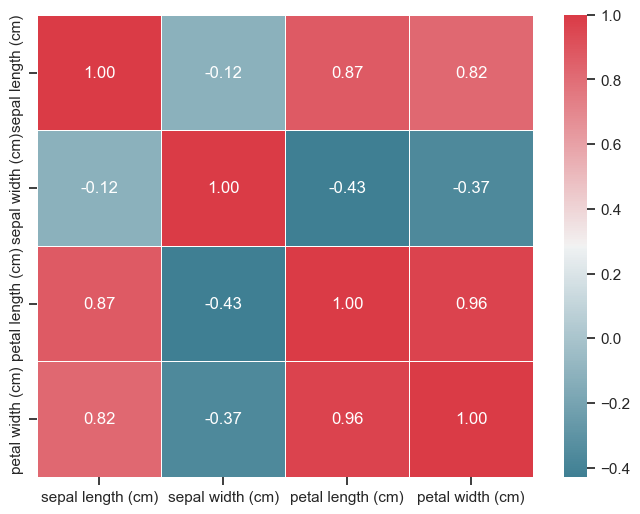

In [370]:
# 4. Create a Combined Correlation Matrix using Seaborn's heatmap
# Calculate the correlation matrix
corr_matrix = df_dropped[data.feature_names].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=cmap, linewidths=.5, fmt=".2f")

plt.savefig("corr_matrix.svg")

plt.show()

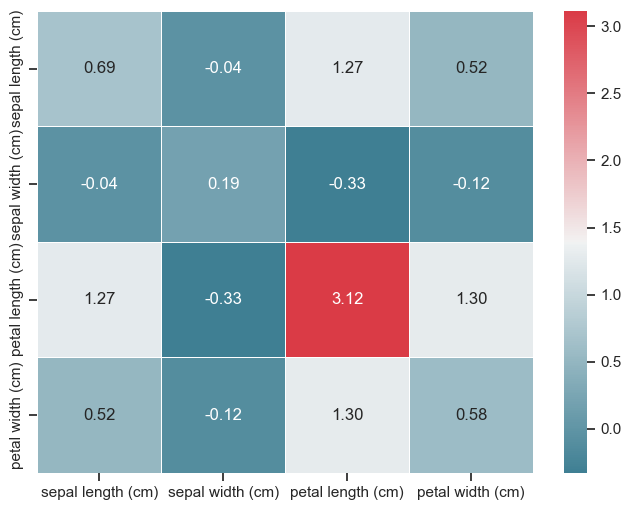

In [371]:
# covariance matrix not standardized

cov_matrix = df_dropped[data.feature_names].cov()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cov_matrix, annot=True, cmap=cmap, linewidths=.5, fmt=".2f")

plt.savefig("unstandardized_cov_matrix.svg")

plt.show()


In [372]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [373]:
# Standardize

features = data.feature_names

means_x = df[features].mean()
stds = df[features].std()

df_standardized = (df[features] - means_x) / stds

df_standardized

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994
146,0.551486,-1.278680,0.703564,0.919223
147,0.793012,-0.131539,0.816859,1.050416
148,0.430722,0.786174,0.930154,1.443994


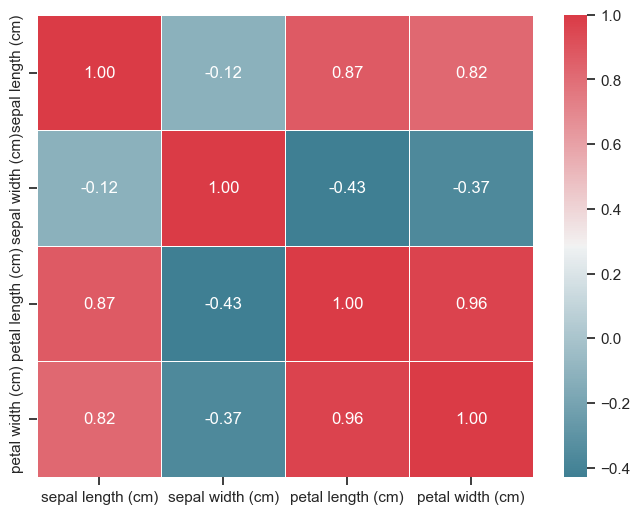

In [374]:
# covariance matrix not standardized

cov_matrix = df_standardized[data.feature_names].cov()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cov_matrix, annot=True, cmap=cmap, linewidths=.5, fmt=".2f")

plt.savefig("standardized_cov_matrix.svg")

plt.show()


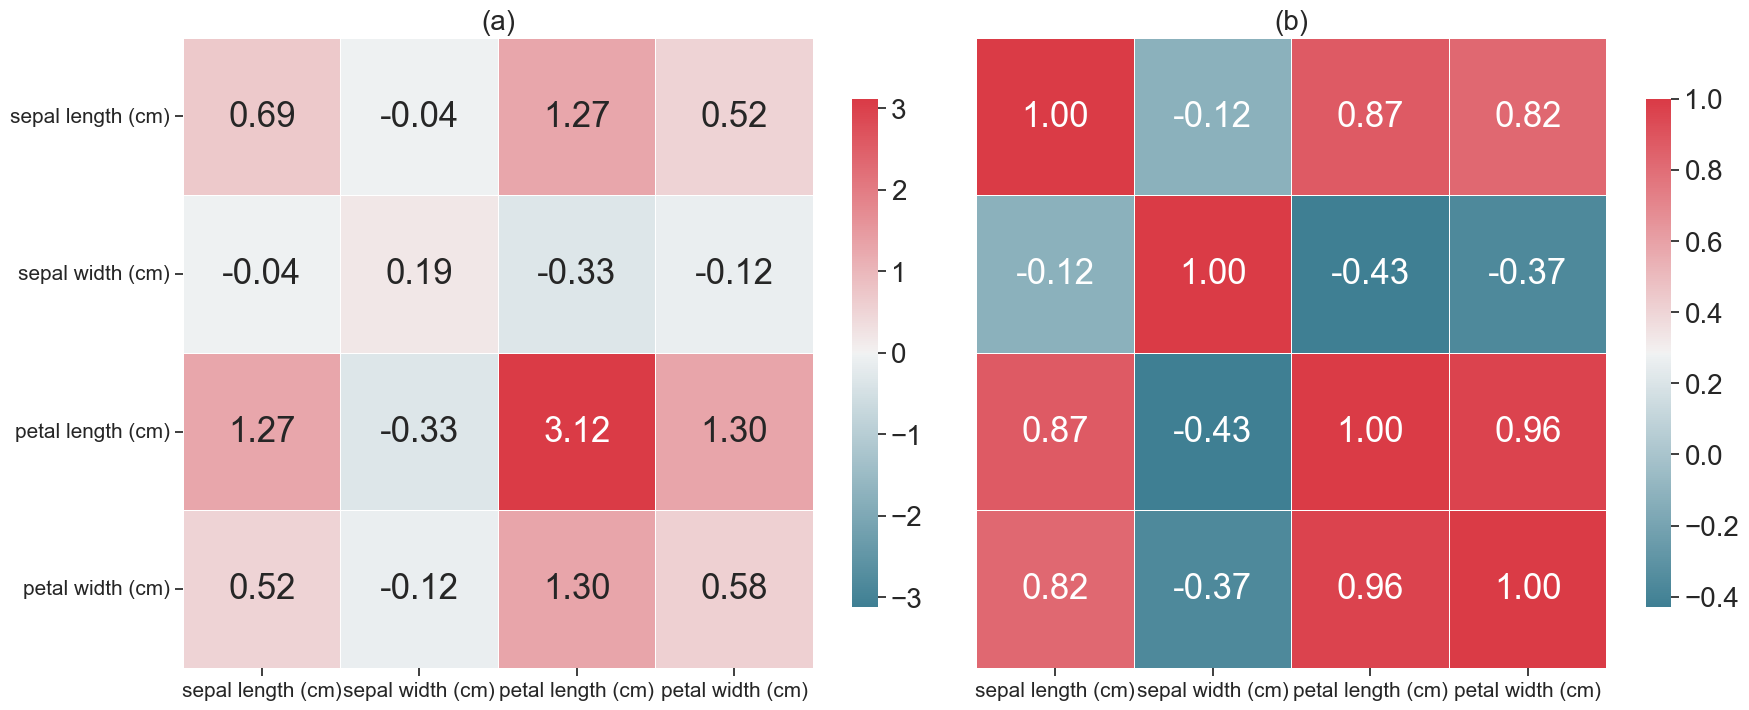

In [375]:


# Assuming 'df' and 'df_standardized' are your DataFrames
# and 'data.feature_names' contains your feature column names
feature_columns = data.feature_names  # Replace with your actual feature names

# Calculate Covariance Matrices
cov_matrix_unstandardized = df[feature_columns].cov()
cov_matrix_standardized = df_standardized[feature_columns].cov()

max_abs = np.abs(cov_matrix_unstandardized.values).max()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))  # 1 row, 2 columns

# Define color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot Unstandardized Covariance Matrix
sns.heatmap(
    cov_matrix_unstandardized,
    annot=True,
    cmap=cmap,
    linewidths=.5,
    fmt=".2f",
    ax=axes[0],
    square=True,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 25},
    vmin=-max_abs,
    vmax=max_abs
)
axes[0].set_title('(a)', fontsize=20)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0, fontsize=15)
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, fontsize=15)

# Access and adjust the colorbar tick label font size for the unstandardized heatmap
colorbar_unstd = axes[0].collections[0].colorbar
colorbar_unstd.ax.tick_params(labelsize=20)  # Increase colorbar tick label font size

# Plot Standardized Covariance Matrix
sns.heatmap(
    cov_matrix_standardized,
    annot=True,
    cmap=cmap,
    linewidths=.5,
    fmt=".2f",
    ax=axes[1],
    square=True,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 25}
)
axes[1].set_title('(b)', fontsize=20)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0, fontsize=15)
axes[1].tick_params(axis='y', which='both', left=False, labelleft=False)

# Access and adjust the colorbar tick label font size for the unstandardized heatmap
colorbar_unstd = axes[1].collections[0].colorbar
colorbar_unstd.ax.tick_params(labelsize=20)  # Increase colorbar tick label font size

# Adjust layout and save
plt.tight_layout()
plt.savefig("covariance_matrices_combined.svg", bbox_inches='tight')
plt.show()


In [376]:
# unstandardized

cov_matrix_unstandardized_df = df[features].cov()
cov_matrix_unstandardized = cov_matrix_unstandardized_df.values

print("Unstandardized Matix:")
print(cov_matrix_unstandardized)
print("\n") 

# standardized

cov_matrix_standardized_df = df_standardized[features].cov()
cov_matrix_standardized = cov_matrix_standardized_df.values

print("Standardized Matrix:")
print(cov_matrix_standardized)
print("\n") 


Unstandardized Matix:
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


Standardized Matrix:
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]




In [377]:
from numpy.linalg import eig

# uses the method to calculate the eigenvalues/eigenvectors
eigenvalue_unstandardized, eigenvector_unstandardized=eig(cov_matrix_unstandardized)
eigenvalue_standardized, eigenvector_standardized=eig(cov_matrix_standardized)

# unstandardized
# prints the eigenvalues
print('Unstandarized Eigenvalues:')
print(eigenvalue_unstandardized) 
print("\n") 

# prints the eigenvectors
print('Unstandarized Eigenvectors:')
print(eigenvector_unstandardized) 
print("\n") 

# standardized
print('Standarized Eigenvalues:')
print(eigenvalue_standardized) 
print("\n") 

# prints the eigenvectors
print('Standarized Eigenvectors:')
print(eigenvector_standardized) 
print("\n") 

Unstandarized Eigenvalues:
[4.22824171 0.24267075 0.0782095  0.02383509]


Unstandarized Eigenvectors:
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


Standarized Eigenvalues:
[2.91849782 0.91403047 0.14675688 0.02071484]


Standarized Eigenvectors:
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]




In [378]:
magnitudes = []

# iterates through the first axis
for i in range(len(eigenvector_standardized)):
    # creates a temporary variable to hold the magnitudes
    magnitude_i = 0

    # iterates over the second axis
    for j in range(len(eigenvector_standardized[i])):
        # gets the coefficient at coordinates (i, j)
        coefficient_ij = eigenvector_standardized[i,j]
        # squares this and adds it to the temporary valye
        magnitude_i = magnitude_i+(coefficient_ij**2)

    # gets the square root and puts it into an array
    magnitudes.append(np.sqrt(magnitude_i))

# prints the magnitudes
print('List of the magnitudes of the standardized eigenvectors:', magnitudes)

List of the magnitudes of the standardized eigenvectors: [1.0000000000000002, 1.0, 0.9999999999999999, 0.9999999999999996]


In [379]:
magnitudes = []

# iterates through the first axis
for i in range(len(eigenvector_unstandardized)):
    # creates a temporary variable to hold the magnitudes
    magnitude_i = 0

    # iterates over the second axis
    for j in range(len(eigenvector_unstandardized[i])):
        # gets the coefficient at coordinates (i, j)
        coefficient_ij = eigenvector_unstandardized[i,j]
        # squares this and adds it to the temporary valye
        magnitude_i = magnitude_i+(coefficient_ij**2)

    # gets the square root and puts it into an array
    magnitudes.append(np.sqrt(magnitude_i))

# prints the magnitudes
print('List of the magnitudes of the unstandardized eigenvectors:', magnitudes)

List of the magnitudes of the unstandardized eigenvectors: [1.0000000000000007, 1.0000000000000004, 1.0, 0.9999999999999991]


In [380]:
def sort_eigens(eigenvalues, eigenvectors):
    # creates a pandas dataframe out of the eigenvectors
    df_eigen = pd.DataFrame(eigenvectors)

    # adds a column for the eigenvalues
    df_eigen['Eigenvalues'] = eigenvalues

    # sorts the dataframe in place by eigenvalue
    df_eigen.sort_values("Eigenvalues", inplace=True, ascending=False)

    # makes a numpy array out of the sorted eigenvalue column
    sorted_eigenvalues = np.array(df_eigen['Eigenvalues'])
    # makes a numpy array out of the rest of the sorted dataframe
    sorted_eigenvectors = np.array(df_eigen.drop(columns="Eigenvalues"))

    # returns the sorted values
    return sorted_eigenvalues, sorted_eigenvectors

In [381]:
standardized_and_sorted = sort_eigens(eigenvalue_standardized,eigenvector_standardized)
unstandardized_and_sorted = sort_eigens(eigenvalue_unstandardized,eigenvector_unstandardized)


print(standardized_and_sorted)

(array([2.91849782, 0.91403047, 0.14675688, 0.02071484]), array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))


In [382]:
def reorient_data(df,eigenvectors):
    # turns the dataframe into a numpy array to enable matrix multiplication
    numpy_data = np.array(df)

    num_pcs = eigenvectors.shape[1]
    column_names = [f"PC{i+1}" for i in range(num_pcs)]

    # mutiplies the data by the eigenvectors to get the data in terms of pca features
    pca_features = np.dot(numpy_data, eigenvectors)

    # turns the new array back into a dataframe for plotting
    pca_df = pd.DataFrame(pca_features,columns=column_names, index=df.index)

    return pca_df

In [383]:
df_dropped = df

df_dropped = df_dropped.drop('species', axis=1)
df_dropped = df_dropped.drop('target', axis=1)

df_dropped

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [384]:
pca_df_standardized = reorient_data(df_standardized,standardized_and_sorted[1])
pca_df_unstandardized = reorient_data(df_dropped,unstandardized_and_sorted[1])


pca_df_standardized['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
pca_df_unstandardized['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


pca_df_standardized


,PC1,PC2,PC3,PC4,species
0,-2.257141,-0.478424,-0.127280,0.024088,setosa
1,-2.074013,0.671883,-0.233826,0.102663,setosa
2,-2.356335,0.340766,0.044054,0.028282,setosa
3,-2.291707,0.595400,0.090985,-0.065735,setosa
4,-2.381863,-0.644676,0.015686,-0.035803,setosa
...,...,...,...,...,...
145,1.864258,-0.385674,0.255418,0.387957,virginica
146,1.559356,0.893693,-0.026283,0.219457,virginica
147,1.516091,-0.268171,0.179577,0.118773,virginica
148,1.368204,-1.007878,0.930279,0.026041,virginica


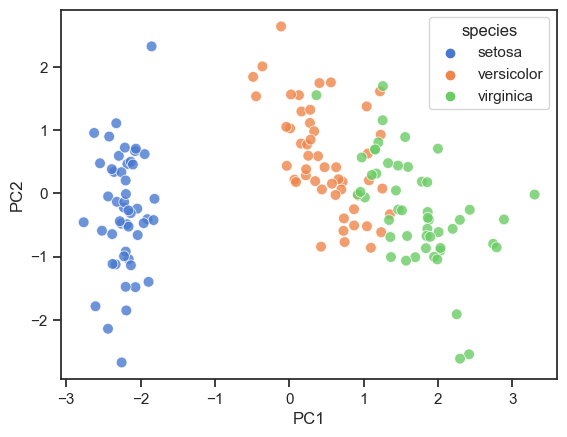

In [385]:
g = sns.scatterplot(data=pca_df_standardized, x="PC1", y="PC2", hue='species', palette='muted', s=60, alpha=0.8)

g.figure.savefig("standardized-PCA.svg", bbox_inches='tight')

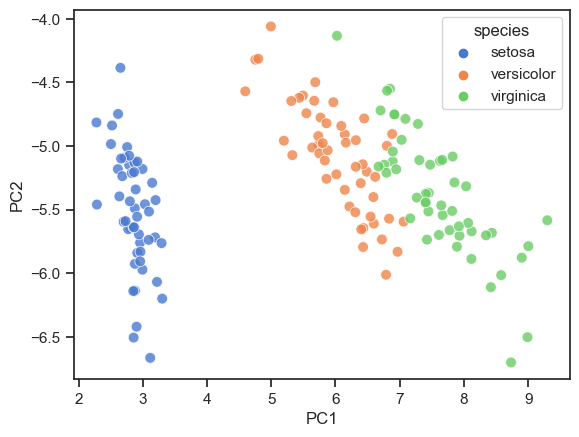

In [386]:
g = sns.scatterplot(data=pca_df_unstandardized, x="PC1", y="PC2", hue='species', palette='muted', s=60, alpha=0.8)

g.figure.savefig("unstandardized-PCA.svg", bbox_inches='tight')

In [387]:
# adjust the second PC2 to align with the graph generated by the PCA function. This is allowed as eigenvectors have arbitray sign, i.e v = -v

adjusted_pca_df_standardized = pca_df_standardized
adjusted_pca_df_standardized["PC2"] = adjusted_pca_df_standardized["PC2"] * -1

adjusted_pca_df_unstandardized = pca_df_unstandardized
adjusted_pca_df_unstandardized["PC2"] = adjusted_pca_df_unstandardized["PC2"] * -1

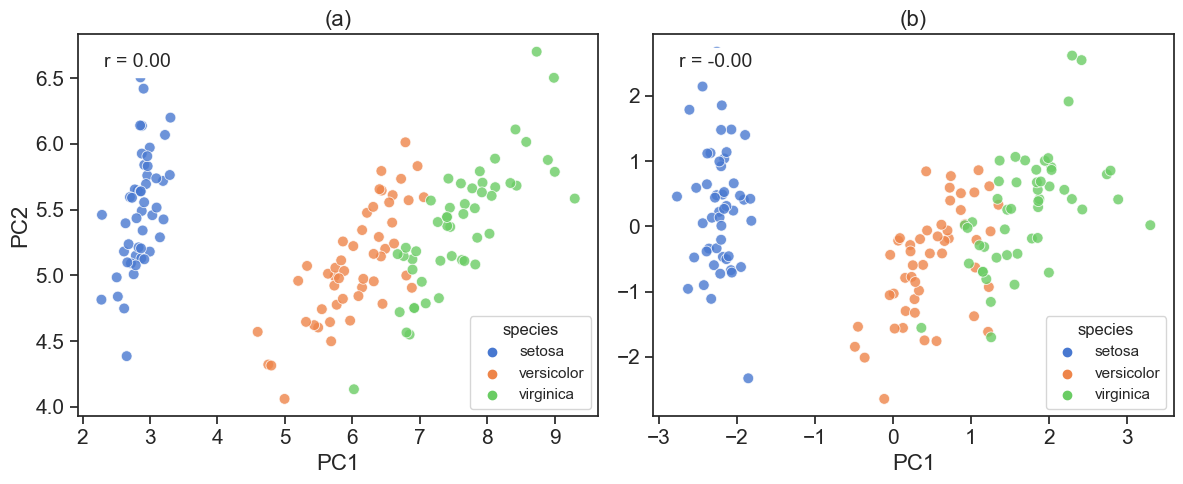

In [388]:
# combined plot

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# standardized

sns.scatterplot(
    data=adjusted_pca_df_standardized,
    x="PC1",
    y="PC2",
    hue='species',
    palette='muted',
    s=60,
    alpha=0.8,
    ax=axes[1]
)

# sns.regplot(
#     data=pca_df_standardized,
#     x="PC1",
#     y="PC2",
#     scatter=False,
#     ax=axes[0],
#     color='black',
#     line_kws={'linewidth': 2}
# )

r_std, p_std = pearsonr(adjusted_pca_df_standardized['PC1'], adjusted_pca_df_standardized['PC2'])

axes[1].annotate(f'r = {r_std:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                 fontsize=14, ha='left', va='top', backgroundcolor='white')


axes[1].set_title('(b)', fontsize=16)
axes[1].set_xlabel('PC1', fontsize=16)
axes[0].set_ylabel('PC2', fontsize=16)
axes[1].tick_params(axis='y', labelrotation=0, labelsize=15)

# unstandardized


#axes[1].tick_params(axis='y', which='both', left=False, labelleft=False)


sns.scatterplot(
    data=adjusted_pca_df_unstandardized,
    x="PC1",
    y="PC2",
    hue='species',
    palette='muted',
    s=60,
    alpha=0.8,
    ax=axes[0]
)

# sns.regplot(
#     data=pca_df_unstandardized,
#     x="PC1",
#     y="PC2",
#     scatter=False,
#     ax=axes[1],
#     color='black',
#     line_kws={'linewidth': 2}
# )

r_std, p_std = pearsonr(adjusted_pca_df_unstandardized['PC1'], adjusted_pca_df_unstandardized['PC2'])

axes[0].annotate(f'r = {r_std:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                 fontsize=14, ha='left', va='top', backgroundcolor='white')

axes[0].set_title('(a)', fontsize=16)
axes[0].set_xlabel('PC1', fontsize=16)
axes[1].set_ylabel('', fontsize=16)
axes[0].tick_params(axis='y', labelrotation=0, labelsize=15)

axes[0].tick_params(axis='x', labelrotation=0, labelsize=15)
axes[1].tick_params(axis='x', labelrotation=0, labelsize=15)

plt.tight_layout()
plt.savefig("combined-PCA.svg", bbox_inches=    'tight')
plt.show()



Text(0.65, 0.2, 'r = -0.00 ')

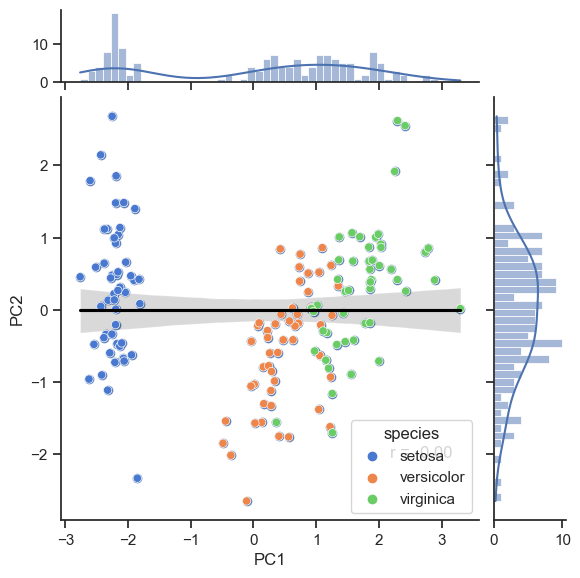

In [389]:
# Define the seaborn plot style ("ticks" is good for natural science)
sns.set_theme(style="ticks")

x_i = pca_df_standardized['PC1']
y_i = pca_df_standardized['PC2']

# Make a seaborn joint plot including regression (trend) line
# the joint_kws parametr is used to color the line differently to make it stand out more
g=sns.jointplot(x=x_i, y=y_i, kind='reg', joint_kws={'line_kws':{'color':'black'}},marginal_ticks=True, marginal_kws={'bins': 50, 'kde': True}  )
# Note we explicitly use the log of the data here rather than the yscale parameter as we want to have the
# regression performed on the log of the data already

# Make proper labels
#g.ax_joint.set(xlabel='planet radius log($R_J$)', ylabel='planet mass log($M_J$)')

# seaborn only visualises data, need statistic function to calculate r
#from scipy.stats import pearsonr
r, p = pearsonr(x_i, y_i)

# Add a text annotation containing the "r-value", the xycoords= command defines if the position of the 
# text is given in absolute values or as fraction of the figure size
g.plot_joint(sns.scatterplot, hue=pca_df_standardized['species'], palette="muted")


g.ax_joint.annotate('r = {:.2f} '.format(r), xy=(0.65, 0.2), xycoords='figure fraction')


# Save the resulting plot in a vector graphic format
#g.savefig("petal_length_vs_sepal_length.svg", bbox_inches='tight')



Text(0.65, 0.2, 'r = 0.00 ')

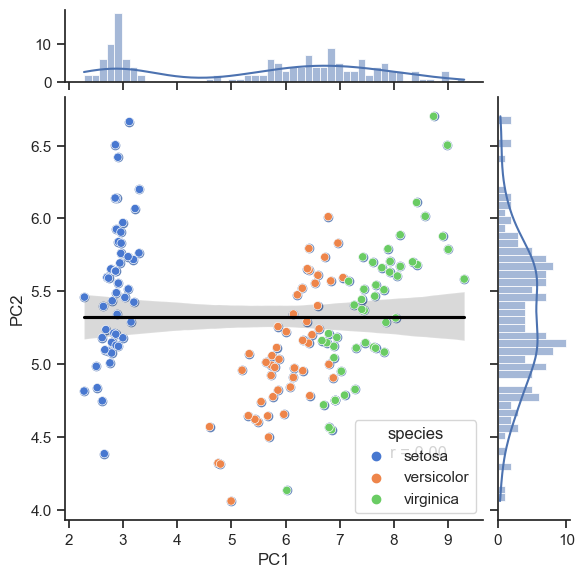

In [390]:
# Define the seaborn plot style ("ticks" is good for natural science)
sns.set_theme(style="ticks")

x_i = pca_df_unstandardized['PC1']
y_i = pca_df_unstandardized['PC2']

# Make a seaborn joint plot including regression (trend) line
# the joint_kws parametr is used to color the line differently to make it stand out more
g=sns.jointplot(x=x_i, y=y_i, kind='reg', joint_kws={'line_kws':{'color':'black'}},marginal_ticks=True, marginal_kws={'bins': 50, 'kde': True}  )
# Note we explicitly use the log of the data here rather than the yscale parameter as we want to have the
# regression performed on the log of the data already

# Make proper labels
#g.ax_joint.set(xlabel='planet radius log($R_J$)', ylabel='planet mass log($M_J$)')

# seaborn only visualises data, need statistic function to calculate r
from scipy.stats import pearsonr
r, p = pearsonr(x_i, y_i)

# Add a text annotation containing the "r-value", the xycoords= command defines if the position of the 
# text is given in absolute values or as fraction of the figure size
g.plot_joint(sns.scatterplot, hue=pca_df_unstandardized['species'], palette="muted")


g.ax_joint.annotate('r = {:.2f} '.format(r), xy=(0.65, 0.2), xycoords='figure fraction')


# Save the resulting plot in a vector graphic format
#g.savefig("petal_length_vs_sepal_length.svg", bbox_inches='tight')



In [391]:
# Define the 'muted' color palette
palette = sns.color_palette("muted")

# Map each species to a specific color
unique_species = pca_df_unstandardized['species'].unique()
color_dict = dict(zip(unique_species, palette))
colors = pca_df_unstandardized['species'].map(color_dict)


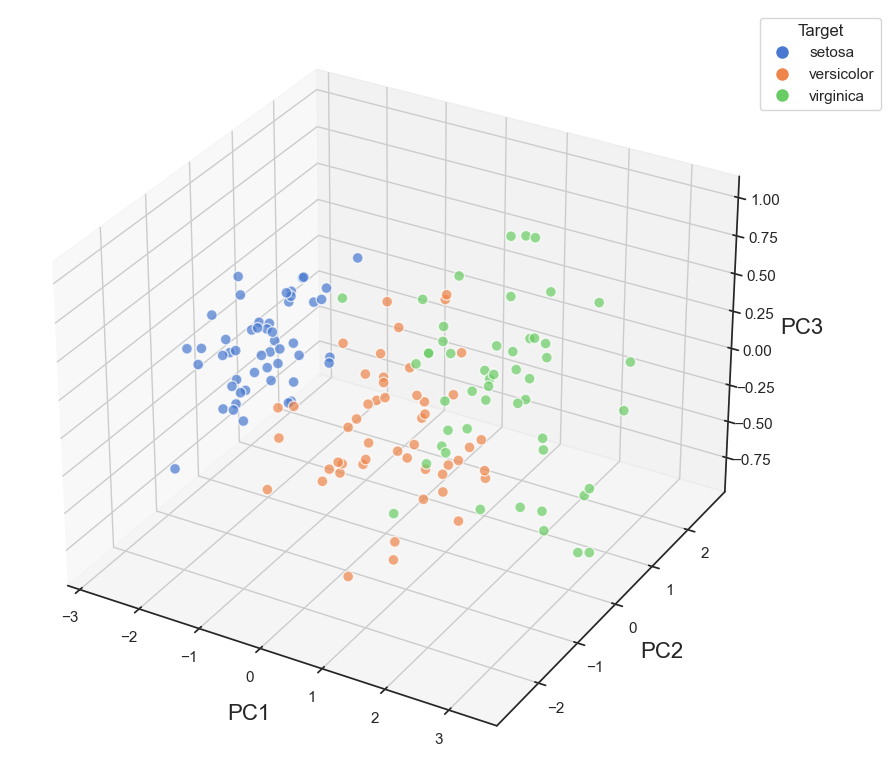

In [ ]:
# Define the 'muted' color palette
plt.rcParams['figure.constrained_layout.use'] = False

palette = sns.color_palette("muted")

# Map each species to a specific color
unique_species = pca_df_unstandardized['species'].unique()
color_dict = dict(zip(unique_species, palette))
colors = pca_df_unstandardized['species'].map(color_dict)

sns.set_theme(style="ticks")

# Initialize the figure and a 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract PCA components
x_i = pca_df_standardized['PC1']
y_i = pca_df_standardized['PC2']
z_i = pca_df_standardized['PC3']

# Optionally adjust the position if needed
# ax.set_position([0.1, 0.1, 0.7, 0.8])  # You can tweak or remove this

# Plot the scatter points
scatter = ax.scatter(
    x_i,  # X-axis
    y_i,  # Y-axis
    z_i,  # Z-axis
    c=colors,        # Colors based on target
    s=60,            # Marker size
    alpha=0.7,       # Transparency
    edgecolors='w'    # Marker edge color
)

# Customize the axes labels with increased font size
ax.set_xlabel('PC1', fontsize=16, labelpad=10)
ax.set_ylabel('PC2', fontsize=16, labelpad=10)
ax.set_zlabel('PC3', fontsize=16, labelpad=10)  # Increased label padding

# Create a custom legend
handles = [
    plt.Line2D(
        [0], [0], marker='o', color='w', label=target,
        markerfacecolor=color_dict[target], markersize=10, markeredgecolor='w'
    )
    for target in unique_species
]
ax.legend(handles=handles, title='Target', loc='upper right', bbox_to_anchor=(1.15, 1))

# Enhance the visual style using Seaborn
sns.set_style("whitegrid")

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

# Save the figure with tight bounding box
fig.savefig("3d_scatter_plot_muted_colors.svg", format='svg', bbox_inches='tight')
